In [1]:
import numpy as np
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [2]:
aus_open_2011_matches_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-ausopen-matches.csv'
aus_open_2011_matches = pd.read_csv(aus_open_2011_matches_path) 
aus_open_2011_points_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-ausopen-points.csv'
aus_open_2011_points = pd.read_csv(aus_open_2011_points_path) 

french_open_2011_matches_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-frenchopen-matches.csv'
french_open_2011_matches = pd.read_csv(french_open_2011_matches_path) 
french_open_2011_points_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-frenchopen-points.csv'
french_open_2011_points = pd.read_csv(french_open_2011_points_path) 

us_open_2011_matches_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-usopen-matches.csv'
us_open_2011_matches = pd.read_csv(us_open_2011_matches_path) 
us_open_2011_points_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-usopen-points.csv'
us_open_2011_points = pd.read_csv(us_open_2011_points_path) 


In [6]:
# print(us_open_2011_matches['winner'])
# print(aus_open_2012_points.columns)


In [7]:
match_1_id = aus_open_2011_matches.get('match_id')[0]


In [8]:
match_1_data = dict(aus_open_2011_matches.loc[0])
match_1_points = aus_open_2011_points.loc[aus_open_2011_points['match_id'] == match_1_id]

In [9]:
match_1_data

{'match_id': '2011-ausopen-1101',
 'year': 2011,
 'slam': 'ausopen',
 'match_num': 1101,
 'player1': 'Rafael Nadal',
 'player2': 'Marcos Daniel',
 'status': 'Retired',
 'winner': 1,
 'event_name': "Men's Singles",
 'round': 'Round 1',
 'court_name': 'Rod Laver Arena',
 'court_id': 'A',
 'player1id': 'atpn409',
 'player2id': 'atpd339',
 'nation1': 'ESP',
 'nation2': 'BRA'}

In [10]:
pd.options.display.max_rows = 500

print(match_1_points)

             match_id ElapsedTime  SetNo  P1GamesWon  P2GamesWon  SetWinner  \
0   2011-ausopen-1101    00:00:00    1.0         0.0         0.0          0   
1   2011-ausopen-1101     0:00:00    1.0         0.0         0.0          0   
2   2011-ausopen-1101     0:00:23    1.0         0.0         0.0          0   
3   2011-ausopen-1101     0:00:59    1.0         0.0         0.0          0   
4   2011-ausopen-1101     0:01:57    1.0         1.0         0.0          0   
5   2011-ausopen-1101     0:03:23    1.0         1.0         0.0          0   
6   2011-ausopen-1101     0:04:04    1.0         1.0         0.0          0   
7   2011-ausopen-1101     0:04:27    1.0         1.0         0.0          0   
8   2011-ausopen-1101     0:05:01    1.0         1.0         0.0          0   
9   2011-ausopen-1101     0:05:21    1.0         1.0         0.0          0   
10  2011-ausopen-1101     0:05:53    1.0         2.0         0.0          0   
11  2011-ausopen-1101     0:06:39    1.0         2.0

In [11]:
valid

NameError: name 'valid' is not defined

In [17]:
valid_fields = {
# 'ElapsedTime',
# 'SetNo',
'P1GamesWon',
'P2GamesWon',
# 'SetWinner',
# 'GameNo',
# 'GameWinner',
# 'PointNumber',
# 'PointWinner',
# 'PointServer',
# 'Speed_KMH',
# 'Rally',
'P1Score',
'P2Score',
# 'P1Momentum',
# 'P2Momentum',
'P1PointsWon',
'P2PointsWon',
# 'P1Ace',
# 'P2Ace',
'P1Winner',
'P2Winner',
# 'P1DoubleFault',
# 'P2DoubleFault',
# 'P1UnfErr',
# 'P2UnfErr',
# 'P1NetPoint',
# 'P2NetPoint',
# 'P1NetPointWon',
# 'P2NetPointWon',
# 'P1BreakPoint',
# 'P2BreakPoint',
# 'P1BreakPointWon',
# 'P2BreakPointWon',
# 'P1FirstSrvIn',
# 'P2FirstSrvIn',
# 'P1FirstSrvWon',
# 'P2FirstSrvWon',
# 'P1SecondSrvIn',
# 'P2SecondSrvIn',
# 'P1SecondSrvWon',
# 'P2SecondSrvWon',
# 'P1ForcedError',
# 'P2ForcedError',
# 'History',
# 'Speed_MPH',
# 'P1BreakPointMissed',
# 'P2BreakPointMissed',
# 'ServeIndicator',
# 'P1TurningPoint', 
# 'P2TurningPoint'
}

shuffle_pairs = {
    ('P1GamesWon','P2GamesWon'),
    ('P1BreakPointMissed','P2BreakPointMissed'),
    ('P1Score', 'P2Score'),
    ('P1Momentum', 'P2Momentum'),
    ('P1PointsWon', 'P2PointsWon'),
    ('P1Ace', 'P2Ace'),
    ('P1Winner', 'P2Winner'),
    ('P1DoubleFault', 'P2DoubleFault'),
    ('P1UnfErr', 'P2UnfErr'),
    ('P1NetPoint', 'P2NetPoint'),
    ('P1NetPointWon', 'P2NetPointWon'),
    ('P1BreakPoint', 'P2BreakPoint'),
    ('P1BreakPointWon', 'P2BreakPointWon'),
    ('P1FirstSrvIn', 'P2FirstSrvIn'),
    ('P1FirstSrvWon', 'P2FirstSrvWon'),
    ('P1SecondSrvIn', 'P2SecondSrvIn'), 
    ('P1SecondSrvWon', 'P2SecondSrvWon'),
    ('P1ForcedError', 'P2ForcedError'),
    ('P1TurningPoint', 'P2TurningPoint')
}

In [18]:
def parse_time(time_string):
    hr, m, s = [int(x) for x in time_string.split(':')]
    return 3600*hr + 60 * m + s

def extract_numpy_from_match(match_points, shuffle_players=False):
    
    match_points_copy = match_points.copy()
    if shuffle_players:
        for p1_val, p2_val in shuffle_pairs:
            tmp = match_points_copy[p1_val]
            match_points_copy[p1_val] = match_points_copy[p2_val]
            match_points_copy[p2_val] = tmp
    parsed_time = match_points_copy
    parsed_time['ElapsedTime'] = parsed_time['ElapsedTime'].map(lambda x: parse_time(x))
    parsed_scores = parsed_time.replace('AD', 55)
    
    return parsed_scores[list(valid_fields)].to_numpy(dtype=np.float)
    

In [19]:
def get_match_data(match_id, match_data, point_data, soften_curve):
    shuffle_players = random.uniform(0, 1) > 0.5
    winner = match_data.loc[match_data['match_id'] == match_id].iloc[0]['winner'] - 1
    
    point_data = point_data.loc[point_data['match_id'] == match_id]
    num_points = point_data.shape[0]
    
    if shuffle_players:
        winner = (winner + 1) % 2
        assert winner < 2, f'{winner}, {match_id}'
        
    y_gt = np.full(shape=num_points, fill_value=winner, dtype='float')

    if soften_curve:
        if winner == 1:
            for i in range(num_points):
                if i > 25:
                    y_gt[i] = y_gt[i] -0.5*(1.0-(i-25)/(num_points-25))
                else:
                    y_gt[i] = 0.5
        else:
            for i in range(num_points):
                if i > 25:
                    y_gt[i] = y_gt[i] +0.5*(1.0-(i-25)/(num_points-25))
                else:
                    y_gt[i] = 0.5
    
    return extract_numpy_from_match(point_data, shuffle_players), y_gt
    

In [20]:
def get_training_data_from_open(open_matches, open_points):
    data = []
    non_nan_matches = open_matches[open_matches['winner'].isin([0,1])]
    for match_id in non_nan_matches['match_id']:
        data.append(get_match_data(match_id, open_matches, open_points, True))
    return data

In [21]:
training_data_aussie_open = get_training_data_from_open(aus_open_2011_matches, aus_open_2011_points)

In [22]:
x, y = training_data_aussie_open[12]

In [23]:
x.shape

(143, 8)

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [25]:
class TennisLSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(TennisLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        

        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        assert np.sum(torch.isnan(lstm_out).detach().numpy()) < 1, "hit a nan"
        linear_output = self.linear(lstm_out)
        assert np.sum(torch.isnan(linear_output).detach().numpy()) < 1, "hit a nan"
        y_pred = torch.sigmoid(linear_output)
        assert np.sum(torch.isnan(linear_output).detach().numpy()) < 1, "hit a nan"
#         y_pred = F.log_softmax(self.linear(lstm_out))
        return y_pred.view(-1)

In [40]:
def weighted_loss(y_gt, y_pred, weighting=None, alpha=.9, loss_fn=torch.nn.MSELoss(reduction='none')):
    weight = np.ones(y_gt.shape)
    for i in range(weight.shape[0]):
        if weighting is None:
            weight[i] = weight[i]*(.1 + .9*(i/weight.shape[0]))
        else:
            weight[i] = weight[i]*weighting
    weight = torch.from_numpy(weight)
    pointwise_loss = weight * loss_fn(y_gt, y_pred)
    
    assert np.sum(torch.isnan(pointwise_loss).detach().numpy()) < 1, "hit a nan"
    
#     print(weight*pointwise_loss)

    return torch.sum(pointwise_loss)
    

In [54]:
model = TennisLSTM(input_dim=8, hidden_dim=50, batch_size=1, output_dim=1,
                    num_layers=2)

num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
hist = np.zeros(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
loss_fn = weighted_loss
training_data = get_training_data_from_open(aus_open_2011_matches, aus_open_2011_points)
print(f'training on {len(training_data)} examples')
training_data += get_training_data_from_open(us_open_2011_matches, us_open_2011_points)
print(f'training on {len(training_data)} examples')
training_data += get_training_data_from_open(french_open_2011_matches, french_open_2011_points)
print(f'training on {len(training_data)} examples')

for epoch in range(num_epochs):
    losses = []
    # Forward pass
    print(f'epoch {epoch}')
    for i, data in enumerate(training_data[20:]): #janky holdout
        
        model.hidden = model.init_hidden()
#         optimizer.zero_grad()
        X_train, y_train  = data 
        X_train = torch.tensor(X_train, device=device).float()
        y_train = torch.tensor(y_train, device=device).float()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        if i % 10 == 0:
            optimizer.step()
            model.zero_grad()
            optimizer.zero_grad()       
        losses.append(loss.data.numpy())
#         preds = []
#         x_losses = []
#         for i in range(X_train.shape[0]):
#             y_i = torch.tensor(y_train[:i+1], device=device).float()
#             x_i = torch.tensor(X_train[:i+1,:], device=device).float()
#             pred = model(x_i)
#             weight = (.1 + .9*(i/X_train.shape[0]))
#             loss = loss_fn(pred, y_i, weighting=weight)
#             loss.backward()
#             optimizer.step()
#             model.zero_grad()
#             optimizer.zero_grad()       
#             x_losses.append(loss.detach().numpy())
#             preds.append(pred.detach().numpy()[-1])      
#         print(np.mean(losses))
        
#         if True or epoch == num_epochs - 1:# and i > 100:
#             fig = plt.figure()
#             gt = y_train
#             ax = plt.axes()
#             ax.plot(preds);
#             ax.plot(gt);
#             plt.show()
    print(f'epoch {epoch} avg loss {np.mean(losses)}')

        
    



cpu
training on 75 examples
training on 149 examples
training on 241 examples
epoch 0
epoch 0 avg loss 9.280844692368088
epoch 1
epoch 1 avg loss 4.579976264824327
epoch 2
epoch 2 avg loss 1.5895181603193629
epoch 3
epoch 3 avg loss 0.837280767193482
epoch 4
epoch 4 avg loss 0.7091602345301764
epoch 5
epoch 5 avg loss 0.6515973530608596
epoch 6
epoch 6 avg loss 0.624099888665607
epoch 7
epoch 7 avg loss 0.6067836372900044
epoch 8
epoch 8 avg loss 0.5848914476354686
epoch 9
epoch 9 avg loss 0.567627626523291
epoch 10
epoch 10 avg loss 0.55506315557952
epoch 11
epoch 11 avg loss 0.5466513818127039
epoch 12
epoch 12 avg loss 0.5313219598327245
epoch 13
epoch 13 avg loss 0.5300551695989342
epoch 14
epoch 14 avg loss 0.5312364054615764
epoch 15
epoch 15 avg loss 0.5382649164872367
epoch 16
epoch 16 avg loss 0.5152050467997688
epoch 17
epoch 17 avg loss 0.5175455596031205
epoch 18
epoch 18 avg loss 0.5095649112305948
epoch 19
epoch 19 avg loss 0.50213454359299


winner should be 0.9864864864864865
(62, 8)


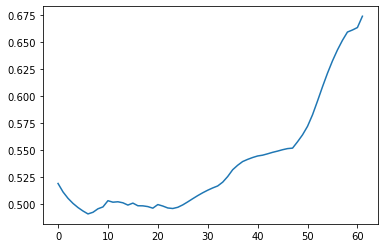


winner should be 0.996875
(185, 8)


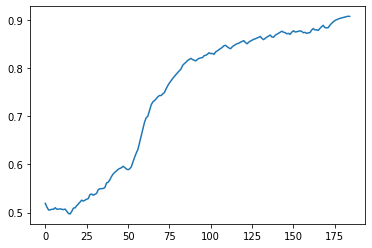


winner should be 0.002873563218390829
(199, 8)


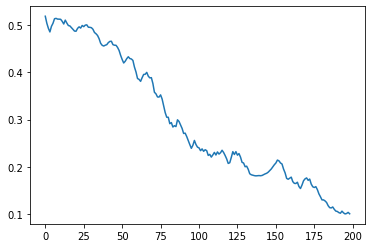


winner should be 0.001381215469613284
(387, 8)


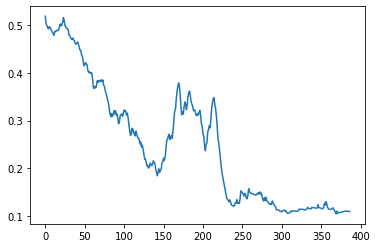


winner should be 0.9968152866242038
(182, 8)


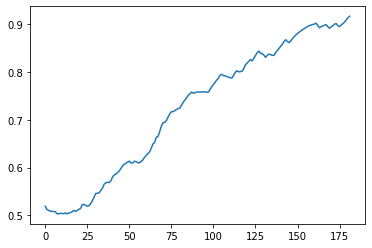


winner should be 0.998046875
(281, 8)


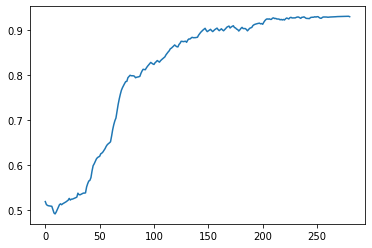


winner should be 0.9959677419354839
(149, 8)


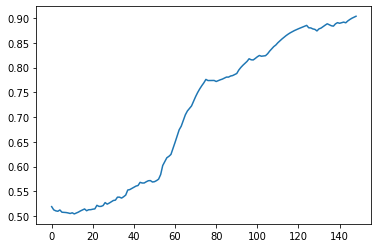


winner should be 0.9959016393442623
(147, 8)


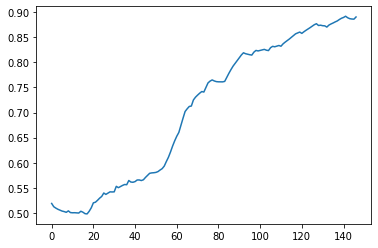


winner should be 0.0040322580645161255
(149, 8)


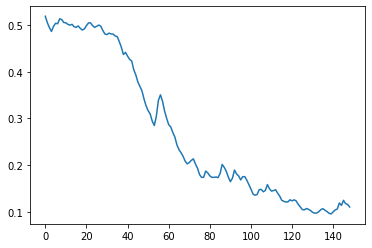


winner should be 0.9974226804123711
(219, 8)


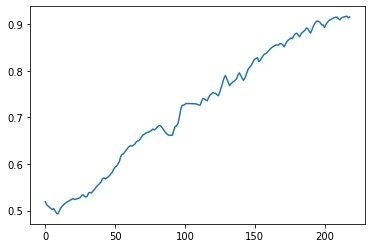


winner should be 0.9980769230769231
(285, 8)


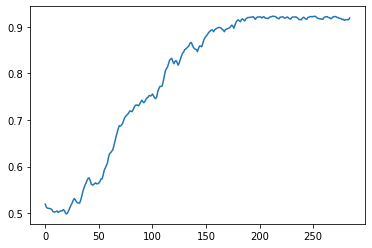


winner should be 0.001618122977346259
(334, 8)


In [ ]:
for i in range(0,20):
    model.hidden = model.init_hidden()
    test_example = training_data[i]
    x, y = test_example
    print(f"winner should be {y[-1]}")
    preds = np.array([])
    print(x.shape)
    for i in range(x.shape[0]):
        x_i = torch.tensor(x[:i+1,:], device=device).float()
        pred = model(x_i)
        preds = np.append(preds, pred.detach().numpy()[-1])
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(preds);
    plt.show()
    #produces identical results to:
#     preds = model(torch.tensor(x, device=device).float()).detach().numpy()
#     fig = plt.figure()
#     ax = plt.axes()
#     ax.plot(preds);
#     plt.show()
    print()